In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Private/Kaggle Practice/Dataset/Loan_Default.csv')
data.head(5)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [ ]:
data.info()

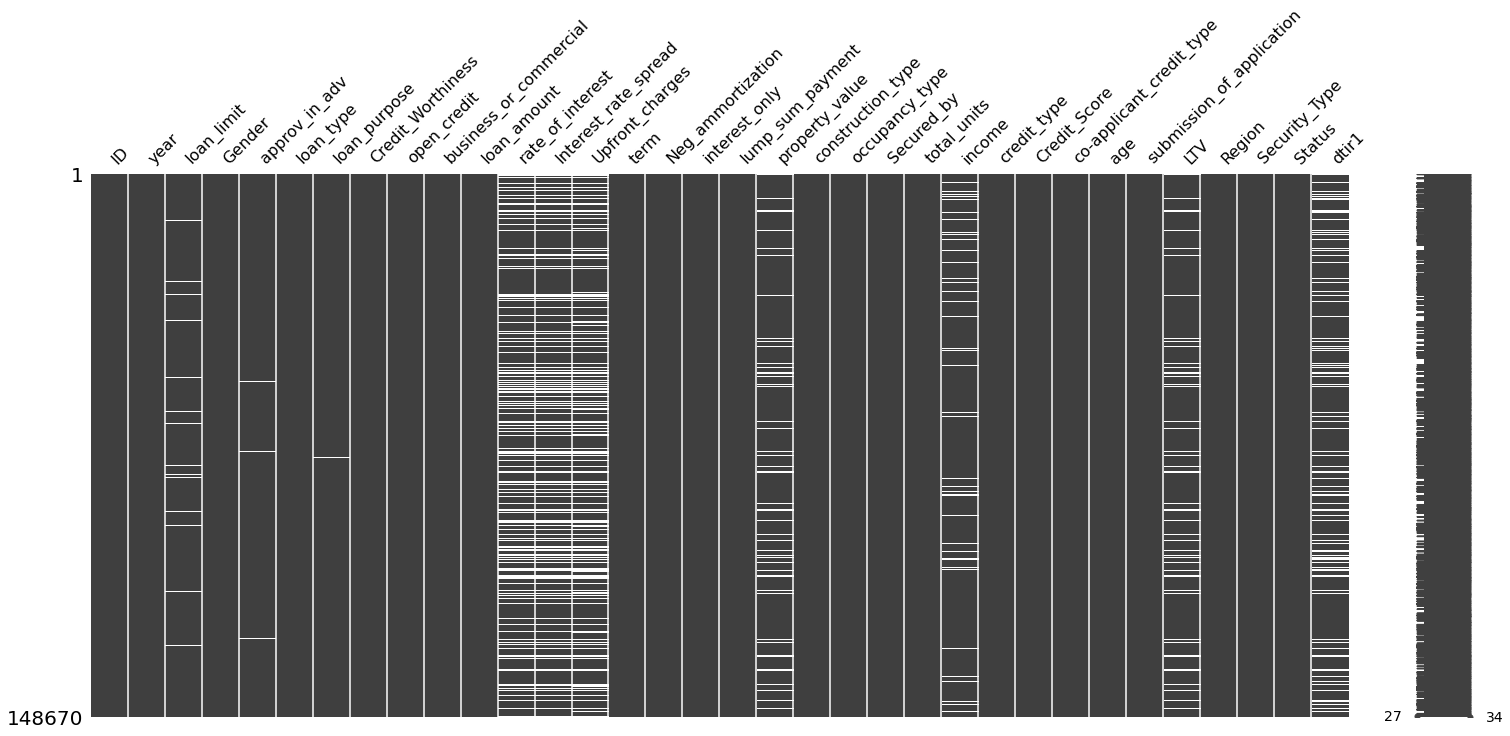

<Figure size 1080x648 with 0 Axes>

In [ ]:
import missingno as missing
missing.matrix()
plt.figure(figsize = (15,9))
plt.show()

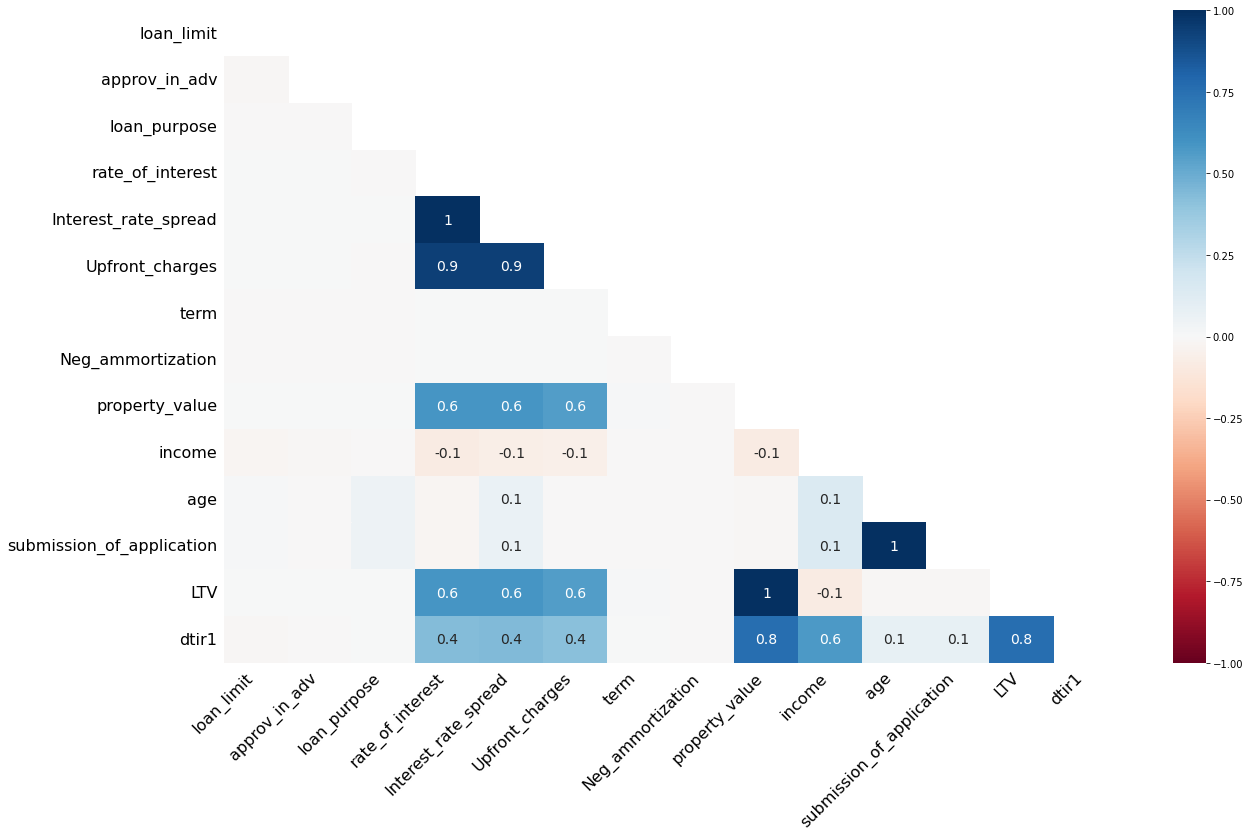

In [ ]:
missing.heatmap(data, labels = True)

In [ ]:
missing_column = [col for col in data.columns if data[col].isnull().sum() > 0]
missing_column

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'Neg_ammortization',
 'property_value',
 'income',
 'age',
 'submission_of_application',
 'LTV',
 'dtir1']

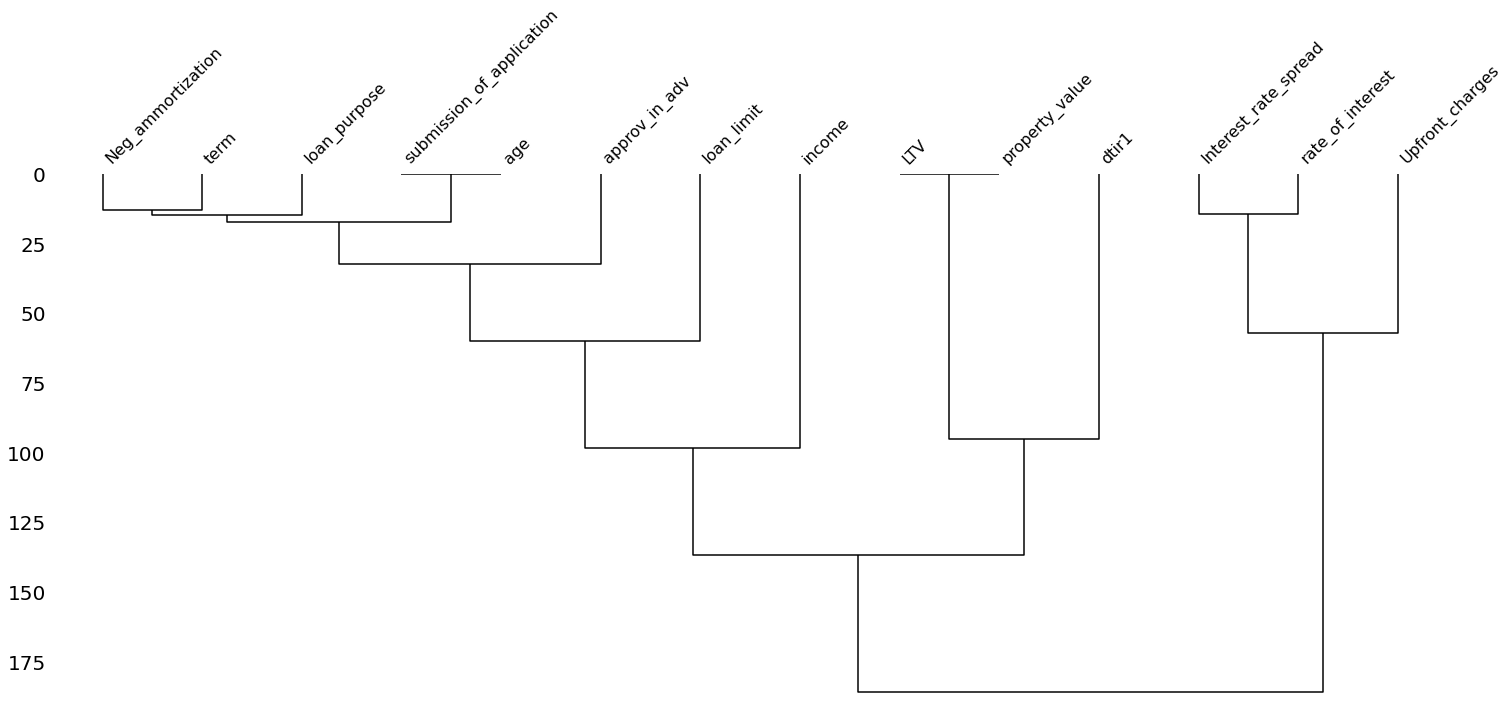

In [ ]:
missing.dendrogram(data[missing_column])

In [ ]:
for col in missing_column:
  per = round((data[col].isnull().sum() /len(data)) * 100,3)
  print(f'{col} : {data[col].isnull().sum()}({per}%)')

loan_limit : 3344(2.249%)
approv_in_adv : 908(0.611%)
loan_purpose : 134(0.09%)
rate_of_interest : 36439(24.51%)
Interest_rate_spread : 36639(24.645%)
Upfront_charges : 39642(26.664%)
term : 41(0.028%)
Neg_ammortization : 121(0.081%)
property_value : 15098(10.155%)
income : 9150(6.155%)
age : 200(0.135%)
submission_of_application : 200(0.135%)
LTV : 15098(10.155%)
dtir1 : 24121(16.225%)


In [ ]:
data_temp = data.copy()
Threshold = 25
for col in missing_column:
  if per > Threshold:
    data_temp.drop(col, axis = 1, inplace = True)



In [ ]:
for row in range(data_temp.shape[0]):
  data_temp.loc[row, 'missing_count'] = data_temp.iloc[row, :].isnull().sum()

In [ ]:
sample_threshold = 5
print("All Samples : {}".format(data_temp.shape[0]))
data_temp.drop(data_temp[data_temp['missing_count']>sample_threshold].index, axis = 0, inplace = True)
print("Samples After Removal : {}".format(data_temp.shape[0]))

All Samples : 148670
Samples After Removal : 132360


In [ ]:
num_cols = [col for col in data_temp.columns if data_temp[col].dtype != 'object']
data_temp = data_temp[num_cols]
data_temp.shape

(132360, 14)

In [ ]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=3)

knn.fit(data_temp)

KNNImputer(n_neighbors=3)

In [ ]:
X = knn.transform(data_temp)
X.isnull().sum()